# Forcing fields

This notebooks serves to show the different forced fields used by the models. In particular ERA40/JRA25 and the averaged versions together with the CORE2 forcing

In [3]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from scipy import signal

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [4]:
def read_forcing(path,dataset,init_year,tot_years):
    # This function is meant to read and store the forcing fields
    # Load adata files
    xdim = 320
    ydim = 160
    tdim = [365*4,366*4]

    data = {'v10m': np.zeros(360*tot_years) , 'u10m' : np.zeros(360*tot_years), \
            'rain': np.zeros(360*tot_years) , 'dlw' : np.zeros(360*tot_years) , \
            'dsw' : np.zeros(360*tot_years) , 'tmp2m_degC' : np.zeros(360*tot_years) , \
            'spfh2m' : np.zeros(360*tot_years), 'rain': np.zeros(360*tot_years)}

    data_all = {'v10m': np.zeros(360*tot_years*4) , 'u10m' : np.zeros(360*tot_years*4), \
                'rain': np.zeros(360*tot_years*4) , 'dlw' : np.zeros(360*tot_years*4) , \
                'dsw' : np.zeros(360*tot_years*4) , 'tmp2m_degC' : np.zeros(360*tot_years*4) , \
                'spfh2m' : np.zeros(360*tot_years*4), 'rain': np.zeros(360*tot_years*4)}


    data_ave = {'v10m': np.zeros(360) , 'u10m' : np.zeros(360), 'rain': np.zeros(360), \
                'dlw' : np.zeros(360) , 'dsw' : np.zeros(360) , 'tmp2m_degC' : np.zeros(360) , \
                'spfh2m' : np.zeros(360), 'rain': np.zeros(360*33),}

    data_ave_all = {'v10m': np.zeros(360*4) , 'u10m' : np.zeros(360*4), 'rain': np.zeros(360*4), \
                'dlw' : np.zeros(360*4) , 'dsw' : np.zeros(360*4) , 'tmp2m_degC' : np.zeros(360*4) , \
                'spfh2m' : np.zeros(360*4), 'rain': np.zeros(360*4),}

    for var in data:
        data_av = []
        #print "Now reading:"+str(var)
        for year in range(tot_years):
            if calendar.isleap(init_year+year):
                tdim_ly = 1
                n_pop = 6
            else:
                tdim_ly = 0
                n_pop = 5

            name = path+dataset+str(var)+'_'+str(init_year+year)
            data_read = komod.mitbin(name,xdim=xdim,ydim=ydim,zdim=1,tdim=tdim[tdim_ly],datatype='float32')
            data_av_temp = np.mean(np.mean(data_read,axis = 3),axis = 2).squeeze(axis = 1)        
            to_pop = random.sample(range(len(data_av_temp)), 4*n_pop)
            data_av_temp = np.delete(data_av_temp,to_pop,0) 
            data_all[var]=data_av_temp
            # Daily average for plotting purpose
            data_av_temp_daily = np.zeros(360)
            for day in range(360):
                data_av_temp_daily[day] = np.mean(data_av_temp[day*4 : day*4 +4])
                
            data_av = np.concatenate([data_av,data_av_temp_daily])
            data[var] = data_av

        name = path+dataset+str(var)+'_average'
        data_read = komod.mitbin(name,xdim=xdim,ydim=ydim,zdim=1,tdim=360*4,datatype='float32')
        data_climy_av = np.mean(np.mean(data_read,axis = 3),axis = 2).squeeze(axis = 1)
        data_ave_all[var]=data_climy_av  
        data_climy_av_daily = np.zeros(360)
        for day in range(360):
            data_climy_av_daily[day] = np.mean(data_climy_av[day*4 : day*4 +4])

        data_climy_33_years = []
        for year in range(tot_years):
            data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av_daily])

        data_ave[var] = data_climy_33_years
        
    clim = {'data' : data , 'data_all' : data_all , 'data_ave' : data_ave , 'data_ave_all' : data_ave_all}
    
    print 'read '+dataset
        
    return clim


In [5]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/forcing/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/forcing/JRA_data/','jra25_',1979,24)
CORE2,time_core = read_core('/scratch/general/am8e13/forcing/CORE2_data/')
titles, unity = dataset_unity()

read cube78_
read ERA40g_
read jra25_
read CORE2


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/matplotlib/mathtext.py:860: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


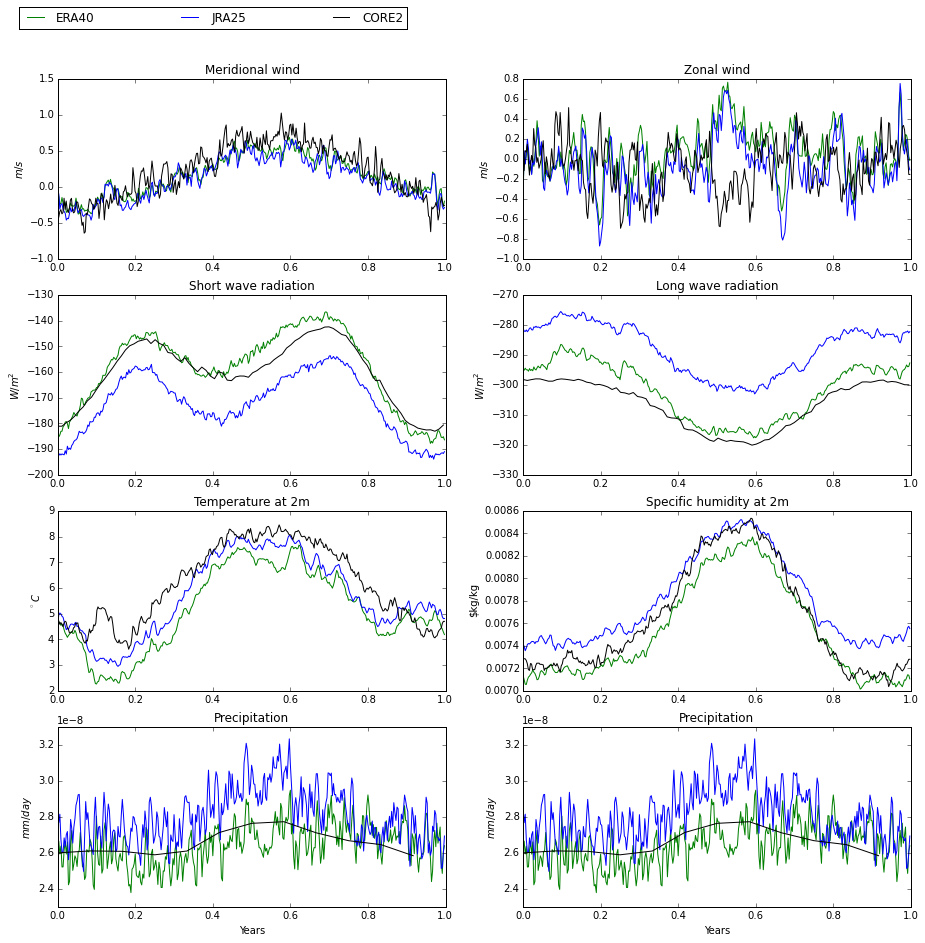

In [6]:
fig, axes = plt.subplots(4,2)
yp = 1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'green',label='ERA40')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue',label='JRA25')
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red', label = 'ERA40 ave')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple', label = 'JRA25 ave')
        if var == 'rain':
            axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black', label = 'CORE2')
        else:
            axes.flat[ax_ind].plot(time_core[var][0:-1:4],CORE2['data_ave'][var][0:-1:4],'black', label = 'CORE2')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
plt.legend(bbox_to_anchor=(-1.3, 3.5, 1., 1.5),ncol=4, mode="expand", borderaxespad=0.)
fig.subplots_adjust(right=2.1,top=3)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


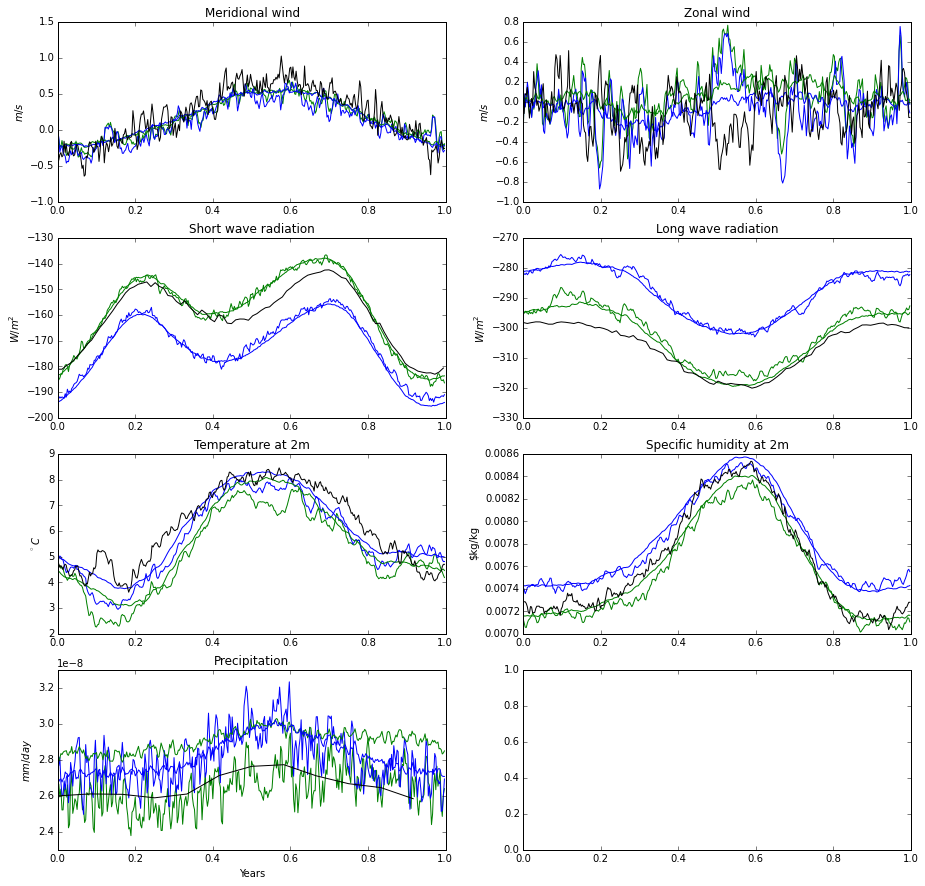

In [7]:
fig, axes = plt.subplots(4,2)
yp = 1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'green',label='ERA40')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue',label='JRA25')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'green', label = 'ERA40 ave')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'blue', label = 'JRA25 ave')
        if var == 'rain':
            axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black', label = 'CORE2')
        else:
            axes.flat[ax_ind].plot(time_core[var][0:-1:4],CORE2['data_ave'][var][0:-1:4],'black', label = 'CORE2')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
#plt.legend(bbox_to_anchor=(-1.3, 3.5, 1., 1.5),ncol=4, mode="expand", borderaxespad=0.)
plt.legend(loc = 'lower center', bbox_to_anchor = (0,-0.1,1,1),
            bbox_transform = plt.gcf().transFigure )
fig.subplots_adjust(right=2.1,top=3)

The following code produces the plot figure "Era ave"

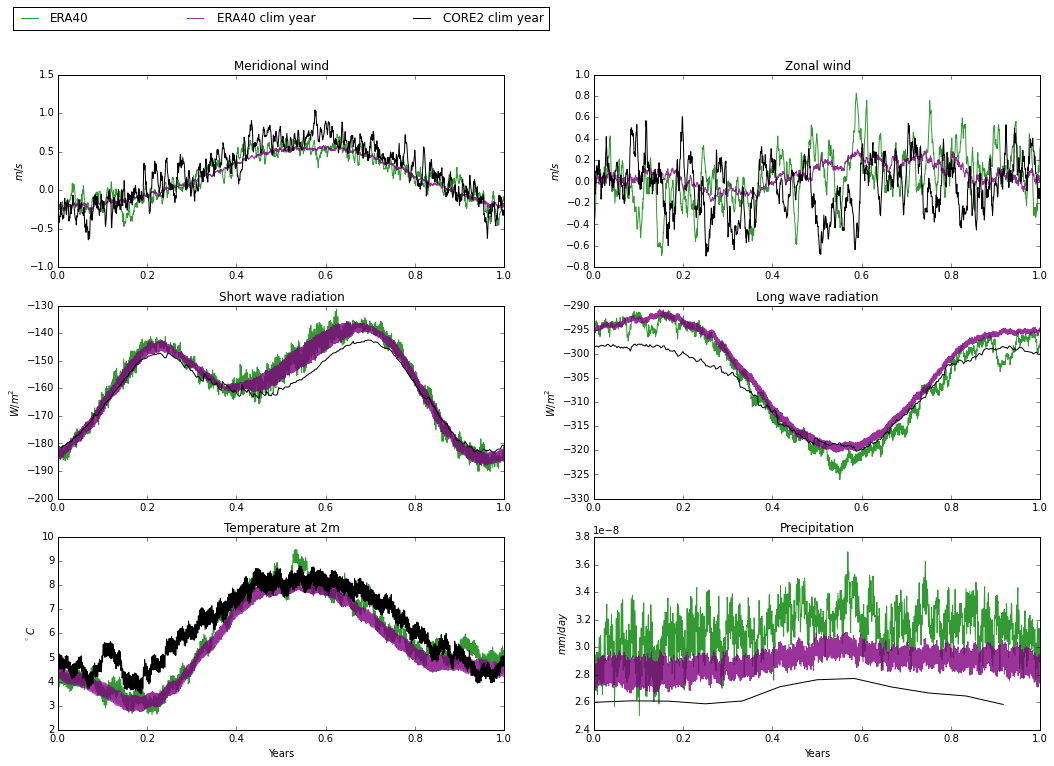

In [8]:
fig, axes = plt.subplots(3,2)
yp =1
start = 10
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','rain']
time = np.array(range(len(ERA['data']['v10m'])))/(4*360.)

for var in ord_var:
    if var == 'rain' or var == 'rain_new33' or var == 'tmp2m_degC':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp*4],ERA['data_all'][var][0:360*yp*4],'green',label='ERA40',alpha=0.8)
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp*4],ERA['data_ave_all'][var][0:360*yp*4],'purple',label='ERA40 clim year',alpha=0.8)
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black',label='CORE2 clim year')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
plt.legend(bbox_to_anchor=(-1.3, 2.25, 1.2, 1.5),ncol=4, mode="expand", borderaxespad=0.)
fig.subplots_adjust(right=2.4,top=2.4)

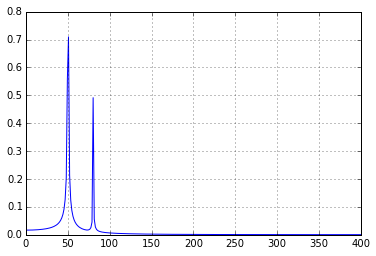

In [100]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()

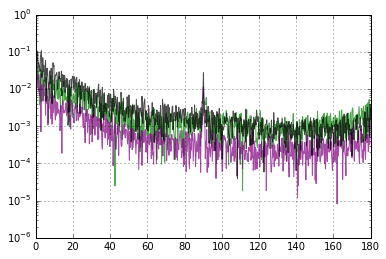

In [214]:
from scipy.fftpack import fft
# Number of sample points
N = 360*4
# sample spacing
T = 1.0 / (360*4)
x = np.linspace(0.0, N*T, N)
y1 = ERA['data_all']['u10m'][0:N]
yf1 = fft(y)

y2 = ERA['data_ave_all']['u10m'][0:N]
yf2 = fft(y2)

y3 = CORE2['data_ave']['u10m'][0:N]
yf3 = fft(y3)

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.semilogy(xf/4, 2.0/N * np.abs(yf1[0:N/2]),'green',alpha=0.7)
plt.semilogy(xf/4, 2.0/N * np.abs(yf2[0:N/2]),'purple',alpha=0.7)
plt.semilogy(xf/4, 2.0/N * np.abs(yf3[0:N/2]),'black',alpha=0.7)


plt.grid()

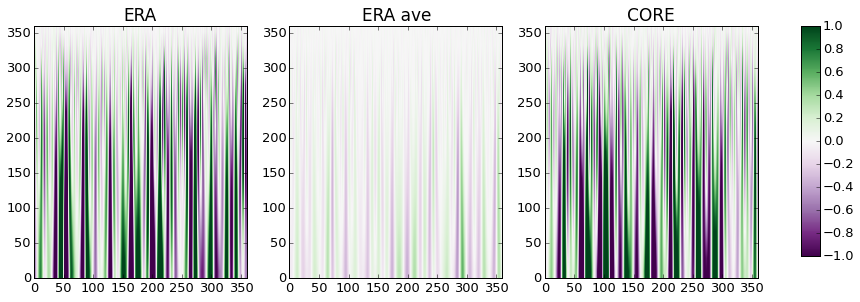

In [213]:
N = 360*4*2
# sample spacing
T = 1.0 / (360*4*2)
x = np.linspace(0.0, N*T, N)
y = ERA['data_all']['v10m'][0:N]
widths = np.arange(1, 20)

fig,axes = plt.subplots(1,3)
for j,var,tit in zip(range(3),[ERA['data_all']['u10m'][0:N],ERA['data_ave_all']['u10m'][0:N], \
                           CORE2['data_ave']['u10m'][0:N]],['ERA','ERA ave','CORE']):
    cwtmatr = signal.cwt(var, signal.ricker, widths)
    cs = axes.flat[j].imshow(cwtmatr, extent=[0, 360, 0, 360], cmap='PRGn', aspect='auto',
            vmax=1, vmin=-1)
    axes.flat[j].set_title(tit,fontsize=17)
    plt.setp([a.get_xticklabels() for a in axes.flat],fontsize=13)            
    plt.setp([a.get_yticklabels() for a in axes.flat],fontsize=13) 
    cbar_ax = fig.add_axes([1.9, 0.2, 0.045, .8])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.tick_params(labelsize=13)
fig.subplots_adjust(right=1.8,top=1.)

In [318]:
dpires = 300

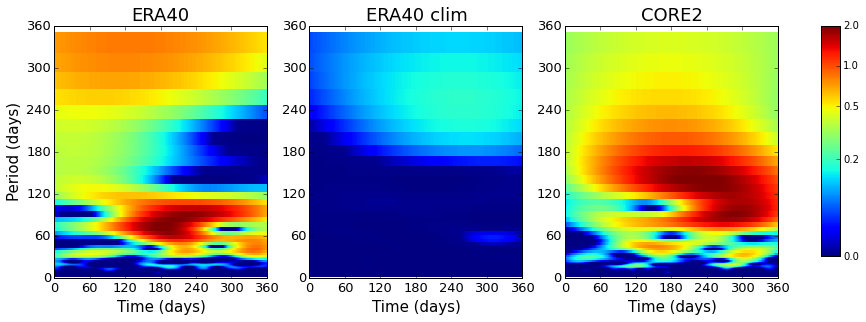

In [321]:
sys.path.append('/noc/users/am8e13/Python/wavelets/')
import wavelets
import matplotlib.colors as colors

N = 360
# given a signal x(t)
x = ERA['data_all']['v10m'][0:N]
x = ERA['data_ave_all']['v10m'][0:N]
x = CORE2['data_ave']['v10m'][0:N]

# and a sample spacing
dt = 1.

var = 'u10m'
fig,axes = plt.subplots(1,3)
for j,x,tit in zip(range(3),[ERA['data_all'][var][0:N],ERA['data_ave_all'][var][0:N], \
                           CORE2['data_ave'][var][0:N]],['ERA40','ERA40 clim','CORE2']):
    wa = wavelets.WaveletAnalysis(x, dt=dt)

    # wavelet power spectrum
    power = wa.wavelet_power
    # scales 
    scales = wa.scales
    # associated time vector
    t = wa.time
    # reconstruction of the original data
    rx = wa.reconstruction()
    T, S = np.meshgrid(t, scales)
    cs = axes.flat[j].pcolormesh(T, S, power, vmin=0,vmax=2,norm=colors.SymLogNorm(linthresh=0.04, linscale=0.04,
                                              vmin=.0, vmax=1.0))
    #axes.flat[j].set_yscale('log')
    #axes.flat[j].set_yticks([0.1,0.5,1])
    plt.setp([a.get_xticklabels() for a in axes.flat],fontsize=13)            
    plt.setp([a.get_yticklabels() for a in axes.flat],fontsize=13) 
    cbar_ax = fig.add_axes([1.9, 0.2, 0.045, .8])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.tick_params([0.,1.,2.],labelsize=13)
    cbar.set_ticks([0,0.2,0.5,1,2])
    axes.flat[j].axis('tight')
    axes.flat[j].set_xticks([0,60,120,180,240,300,360]) 
    axes.flat[j].set_yticks([0,60,120,180,240,300,360]) 
    axes.flat[j].set_title(tit,fontsize=18)
    axes.flat[0].set_ylabel('Period (days)',fontsize=15)
    axes.flat[j].set_xlabel('Time (days)',fontsize=15)
    

fig.subplots_adjust(right=1.8,top=1.)
fig.savefig('/noc/users/am8e13/Figures/forcing_wavelets',dpi=dpires, bbox_inches='tight')

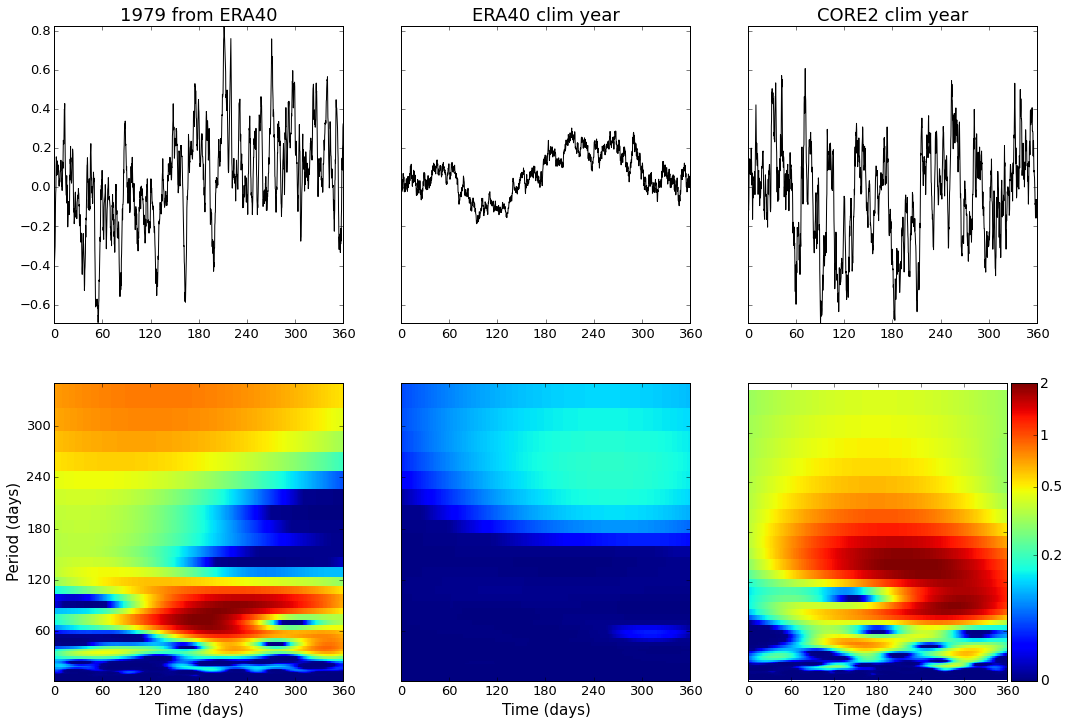

In [440]:
sys.path.append('/noc/users/am8e13/Python/wavelets/')
import wavelets
import matplotlib.colors as colors

N = 360
# given a signal x(t)
x = ERA['data_all']['v10m'][0:N]
x = ERA['data_ave_all']['v10m'][0:N]
x = CORE2['data_ave']['v10m'][0:N]

# and a sample spacing
dt = 1.


fig,axes = plt.subplots(2,3,sharey='row')

yp =1
start = 10
ax_ind = 0
ord_var = ['v10m','u10m','dsw']#,'dlw','tmp2m_degC','rain']
time = np.array(range(len(ERA['data']['v10m'])))/(4*360.)

var = 'u10m'

axes.flat[0].plot(time[0:360*yp*4]*360,ERA['data_all'][var][0:360*yp*4],'black')
axes.flat[1].plot(time[0:360*yp*4]*360,ERA['data_ave_all'][var][0:360*yp*4],'black')
axes.flat[2].plot(time_core[var]*360,CORE2['data_ave'][var],'black')
for ax_ind,tit in zip(range(3),['1979 from ERA40','ERA40 clim year','CORE2 clim year']):    
    axes.flat[ax_ind].set_title(tit,fontsize=18)
    axes.flat[ax_ind].set_xticks([0,60,120,180,240,300,360]) 
    axes.flat[ax_ind].axis('tight')

for j,x,tit in zip(range(3,6),[ERA['data_all'][var][0:N],ERA['data_ave_all'][var][0:N], \
                           CORE2['data_ave'][var][0:N]],['1979 from ERA40','ERA40 clim year','CORE2 clim year']):
    wa = wavelets.WaveletAnalysis(x, dt=dt)

    # wavelet power spectrum
    power = wa.wavelet_power
    # scales 
    scales = wa.scales
    # associated time vector
    t = wa.time
    # reconstruction of the original data
    rx = wa.reconstruction()
    T, S = np.meshgrid(t, scales)
    cs = axes.flat[j].pcolormesh(T, S, power, vmin=0,vmax=2,norm=colors.SymLogNorm(linthresh=0.04, linscale=0.04,
                                              vmin=.0, vmax=1.0))

    plt.setp([a.get_xticklabels() for a in axes.flat],fontsize=13)            
    plt.setp([a.get_yticklabels() for a in axes.flat],fontsize=13) 
    
    if j == 5:    
        div = make_axes_locatable(axes.flat[j])
        cax = div.append_axes("right", size="10%", pad=0.05)
        cbar = plt.colorbar(cs, cax=cax, format="%.2g")
        cbar.set_ticks([0,0.2,0.5,1,2])
        cbar.ax.tick_params(labelsize=14)

    axes.flat[j].axis('tight')
    axes.flat[j].set_xticks([0,60,120,180,240,300,360]) 
    axes.flat[j].set_yticks([0,60,120,180,240,300,360]) 
    axes.flat[3].set_ylabel('Period (days)',fontsize=15)
    axes.flat[j].set_xlabel('Time (days)',fontsize=15)
    
fig.subplots_adjust(right=2.4,top=2.4)
fig.savefig('/noc/users/am8e13/Figures/forcing_wavelets',dpi=dpires, bbox_inches='tight')

In [9]:
def dataset_unity():
    titles = {'v10m': 'Meridional wind' , 'u10m' : 'Zonal wind', 'rain_new33': 'Precipitation new33', \
            'dlw' : 'Long wave radiation' , 'dsw' : 'Short wave radiation' , 'tmp2m_degC' : 'Temperature at 2m' , \
            'spfh2m' : 'Specific humidity at 2m', 'rain': 'Precipitation'}
    unity = {'v10m': r"$m/s$" , 'u10m' : r"$m/s$", 'rain_new33': r"$mm/day$", \
            'dlw' : r"$W/m^2$" , 'dsw' : r"$W/m^2$" , 'tmp2m_degC' : r"$^{\circ}C$" , \
            'spfh2m' : r"$kg/kg", 'rain': r"$mm/day$"}
    return titles,unity
titles, unity = dataset_unity()

The following is to produce a nice picture of the model bathymetry

In [10]:
def grid_read(res):
    ''' use: grid = grid_read(res) '''
    path = "/scratch/general/am8e13/results"+str(res)+"km/grid.nc"
    file2read = netcdf.NetCDFFile(path,'r')
    # Bathy is 1 on land and 0 over sea                                                                                              
    grid = {}
    for var in ['HFacC','HFacW','HFacS','YC','XC','Z','Y','X','Depth']:
        temp = file2read.variables[var]
        grid[var] = temp[:]*1
    file2read.close()
    return grid
grid_toplot = grid_read(9)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


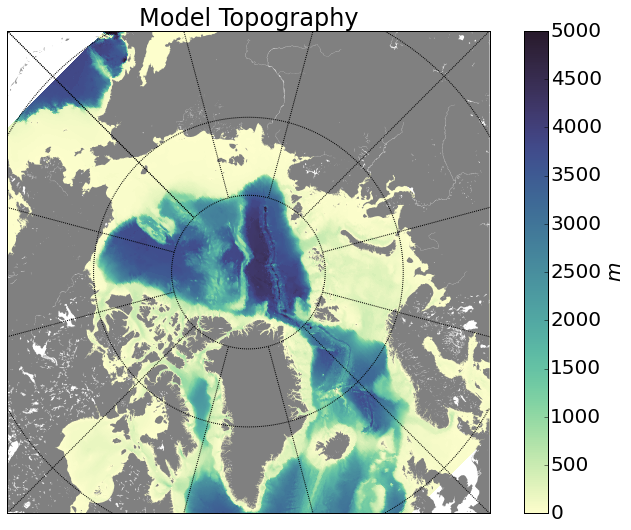

In [313]:
def basemap_bathy(grid):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;
    sgn=1
    width=7000000. ; height=7000000.0 ;
    vmin = 0; vmax = 5000 ;

    fig, axes = plt.subplots(1,1)
    m = Basemap(ax=axes,width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='white')
    x,y=m(grid['XC'],grid['YC'])
    sitm = np.ma.masked_where(np.isnan(grid['HFacC'][0,:,:]),grid['Depth'])
    CS=m.pcolormesh(x,y,sitm,cmap=cmocean.cm.bathymetry,vmin=vmin,vmax=vmax)
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    axes.set_title('Model Topography',fontsize=24)
    #cbar_ax = fig.add_axes([1.9, 0.3, 0.045, 1.4])
    cbar = plt.colorbar(CS)
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(r'$m$',fontsize=20)
    fig.subplots_adjust(right=1.7,top=1.8)
    
basemap_bathy(grid_toplot)

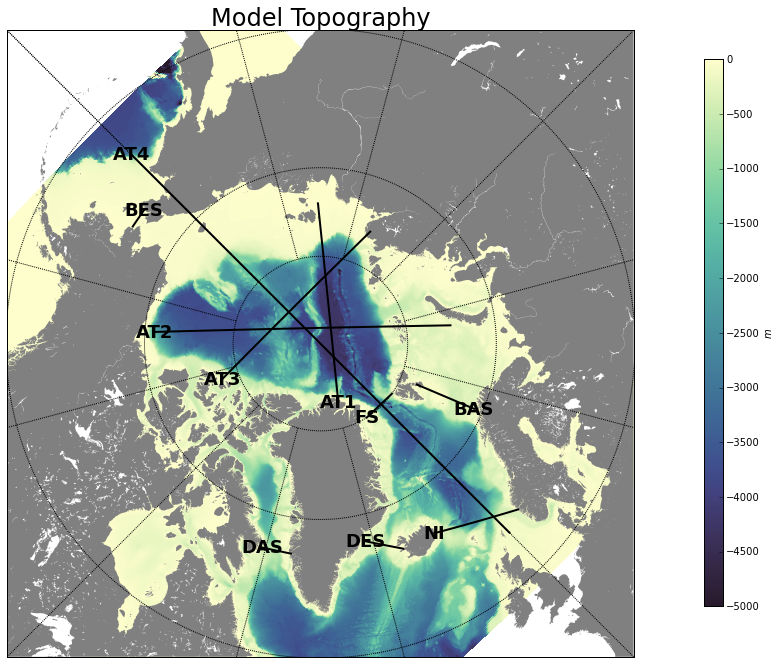

In [316]:
def basemap_bathy_transect(grid):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;
    sgn=1
    width=8000000. ; height=8000000.0 ;
    vmin = -5000; vmax = 0 ;

    fig, axes = plt.subplots(1,1)
    m = Basemap(ax=axes,width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='white')
    x,y=m(grid['XC'],grid['YC'])
    sitm = np.ma.masked_where(np.isnan(grid['HFacC'][0,:,:]),grid['Depth'])
    CS=m.pcolormesh(x,y,-sitm,cmap=cmocean.cm.bathymetry_r,vmin=vmin,vmax=vmax)
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    regions = {"barents" : [22,71,22,78] , "fram" : [-13,80,10,80] , "bering" : [-172,65,-167,65] , \
                "davis" : [-61,66,-53,66] , "arctic1" : [-28,83,136,74] , "arctic2" : [-139,71,53,75],
                "arctic3" : [-115,78,111,76] , "arctic4" : [180,60,0,60],
                "denmark" : [-32 ,67, -23,  65], "norwice" : [-14 ,65 ,5, 61]}
    offs = {"barents" : [0,-100] , "fram" : [0,0] , "bering" : [0,0] , "davis" : [-100,0] , \
               "arctic1" : [0,0] , "arctic2" : [0,0], "arctic3" : [0,0] , "arctic4" : [0,0] ,
               "denmark" : [0,0] , "norwice" : [0,0]}
    texts = {"barents" : "BAS" , "fram" : "FS" , "bering" : "BES" , "davis" : "DAS" , \
             "arctic1" : "AT1" , "arctic2" : "AT2", "arctic3" : "AT3" , "arctic4" : "AT4",
             "denmark" : "DES" , "norwice" : "NI"}
    # lines drawing
    for reg in regions:
        x1 = regions[reg][0] ; x2 = regions[reg][1] ; x3 = regions[reg][2] ; x4 = regions[reg][3]
        m.drawgreatcircle(x1,x2,x3,x4,linewidth=2,color='black')
        xx,yy=m(x1,x2)
        plt.text(xx+offs[reg][0],yy+offs[reg][1],texts[reg],fontsize=18,\
                 fontweight='bold',ha='center',va='center',color='black')

    axes.set_title('Model Topography',fontsize=24)
    cbar_ax = fig.add_axes([2.1, 0.3, 0.045, 1.9])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'$m$')
    fig.subplots_adjust(right=2.3,top=2.3)
    fig.savefig('/noc/users/am8e13/Figures/modelbathymetry',dpi=300, bbox_inches='tight')
basemap_bathy_transect(grid_toplot)

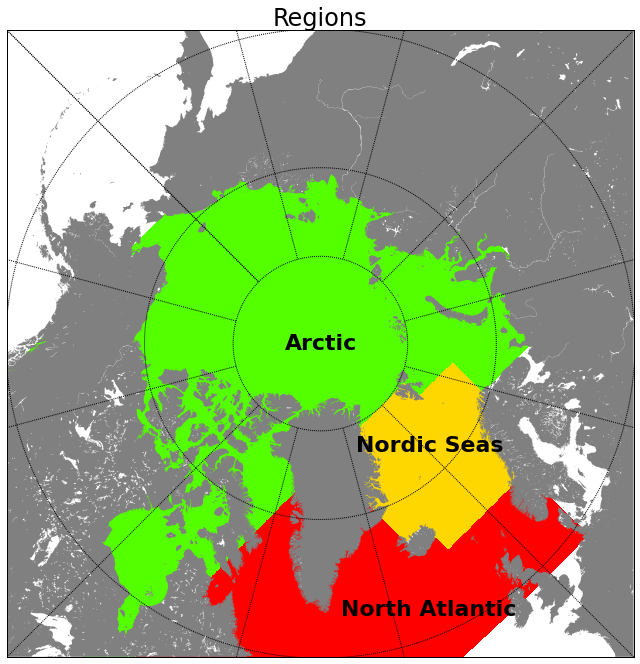

In [25]:
def basemap_bathy_transect(grid):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;
    sgn=1
    width=8000000. ; height=8000000.0 ;
    #vmin = 0; vmax = 4 ;

    fig, axes = plt.subplots(1,1)
    m = Basemap(ax=axes,width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='white')
    x,y=m(grid['XC'],grid['YC'])
    reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8 = region_mask(9)
    mask = np.zeros_like(reg1)
    mask[reg1==1] = 1
    mask[reg2==1] = 2
    mask[reg3==1] = 3
    
    #mask[reg4==1] = 4
    #mask[reg5==1] = 5
    #mask[reg6==1] = 6
    #mask[reg7==1] = 7
    #mask[reg8==1] = 8
    
    mask[mask==0] = np.nan
    
    sitm = np.ma.masked_where(np.isnan(mask[0,:,:]),mask[0,:,:])
    CS=m.pcolormesh(x,y,-sitm,cmap=matplotlib.cm.prism)#cmocean.cm.bathymetry_r)#)#,vmin=vmin,vmax=vmax#)#
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    
    regions = {"reg1" : [0,90]  , "reg2" : [2,73]  , "reg3" : [-23,58] , "reg4" : [0,72], "reg5" : [-10,76] ,\
               "reg6" : [-5,68], "reg7" : [-15,70] , "reg8" : [-50,65]}
    offs = {"reg1" : [0,0]  , "reg2" : [0,0]  , "reg3" : [0,0] , "reg4" : [0,0]  , "reg5" : [0,0]  , "reg6" : [0,0] ,\
           "reg7" : [0,0]  , "reg8" : [0,0] }
    texts = {"reg1" : "Arctic" , "reg2" : "Nordic Seas" , "reg3" : "North Atlantic" , "reg4" : "Lofoten", 
            "reg5" : "Greenland" , "reg6" : "Norwegian" , "reg7" : "Iceland" , "reg8" : "Labrador"}
    # lines drawing
    for reg in ['reg1','reg2','reg3']:
        xx,yy=m(regions[reg][0],regions[reg][1])
        plt.text(xx+offs[reg][0],yy+offs[reg][1],texts[reg],fontsize=22,\
                 fontweight='bold',ha='center',va='center',color='black')

    axes.set_title('Regions',fontsize=24)
    fig.subplots_adjust(right=2.3,top=2.3)
    fig.savefig('/noc/users/am8e13/Figures/regions',dpi=300, bbox_inches='tight')
basemap_bathy_transect(grid_toplot)

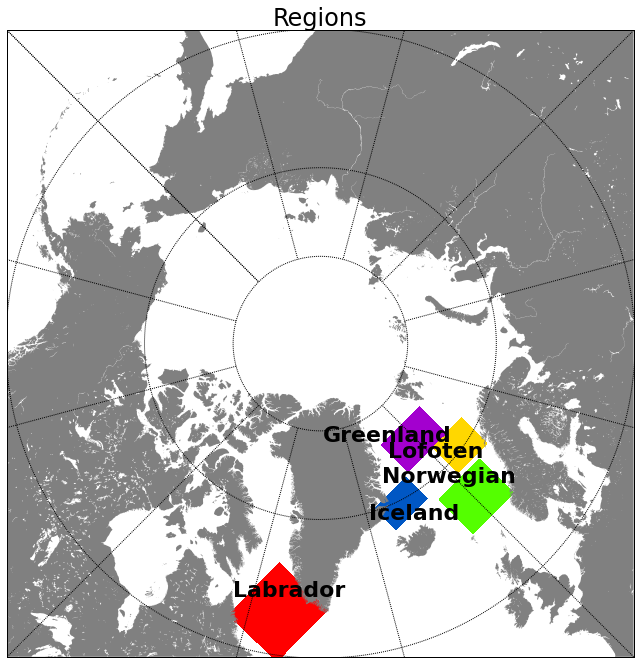

In [29]:
def basemap_bathy_transect(grid):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;
    sgn=1
    width=8000000. ; height=8000000.0 ;
    #vmin = 0; vmax = 4 ;

    fig, axes = plt.subplots(1,1)
    m = Basemap(ax=axes,width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='white')
    x,y=m(grid['XC'],grid['YC'])
    reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8 = region_mask(9)
    mask = np.zeros_like(reg1)
    #mask[reg1==1] = 1
    #mask[reg2==1] = 2
    #mask[reg3==1] = 3
    
    mask[reg4==1] = 4
    mask[reg5==1] = 5
    mask[reg6==1] = 6
    mask[reg7==1] = 7
    mask[reg8==1] = 8
    
    mask[mask==0] = np.nan
    
    sitm = np.ma.masked_where(np.isnan(mask[0,:,:]),mask[0,:,:])
    CS=m.pcolormesh(x,y,-sitm,cmap=matplotlib.cm.prism)#cmocean.cm.bathymetry_r)#)#,vmin=vmin,vmax=vmax#)#
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    
    regions = {"reg1" : [0,90]  , "reg2" : [2,73]  , "reg3" : [-23,58] , "reg4" : [2,72], "reg5" : [-9,77] ,\
               "reg6" : [-1,69], "reg7" : [-16,68] , "reg8" : [-52,62]}
    offs = {"reg1" : [0,0]  , "reg2" : [0,0]  , "reg3" : [0,0] , "reg4" : [0,0]  , "reg5" : [0,0]  , "reg6" : [0,0] ,\
           "reg7" : [0,0]  , "reg8" : [0,0] }
    texts = {"reg1" : "Arctic" , "reg2" : "Nordic Seas" , "reg3" : "North Atlantic" , "reg4" : "Lofoten", 
            "reg5" : "Greenland" , "reg6" : "Norwegian" , "reg7" : "Iceland" , "reg8" : "Labrador"}
    # lines drawing
    for reg in ['reg4','reg5','reg6','reg7','reg8']:
        xx,yy=m(regions[reg][0],regions[reg][1])
        plt.text(xx+offs[reg][0],yy+offs[reg][1],texts[reg],fontsize=22,\
                 fontweight='bold',ha='center',va='center',color='black')

    axes.set_title('Nordic Seas basi',fontsize=24)
    fig.subplots_adjust(right=2.3,top=2.3)
    fig.savefig('/noc/users/am8e13/Figures/basins',dpi=300, bbox_inches='tight')
basemap_bathy_transect(grid_toplot)

In [52]:
path = '/scratch/general/am8e13/perturbation_fields/'
ydim = 840
xdim = 768
zdim = 50
mask_read = komod.mitbin(path+'pertSMask_9km',xdim=xdim,ydim=ydim,zdim=zdim,tdim=1,datatype='float32')
mask_read = np.squeeze(mask_read,axis=0)
values_read = komod.mitbin(path+'pertSValue_9km_100',xdim=xdim,ydim=ydim,zdim=zdim,tdim=1,datatype='float32')
values_read = np.squeeze(values_read,axis=0)

In [53]:
grid_mask = grid_read(9)

In [60]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


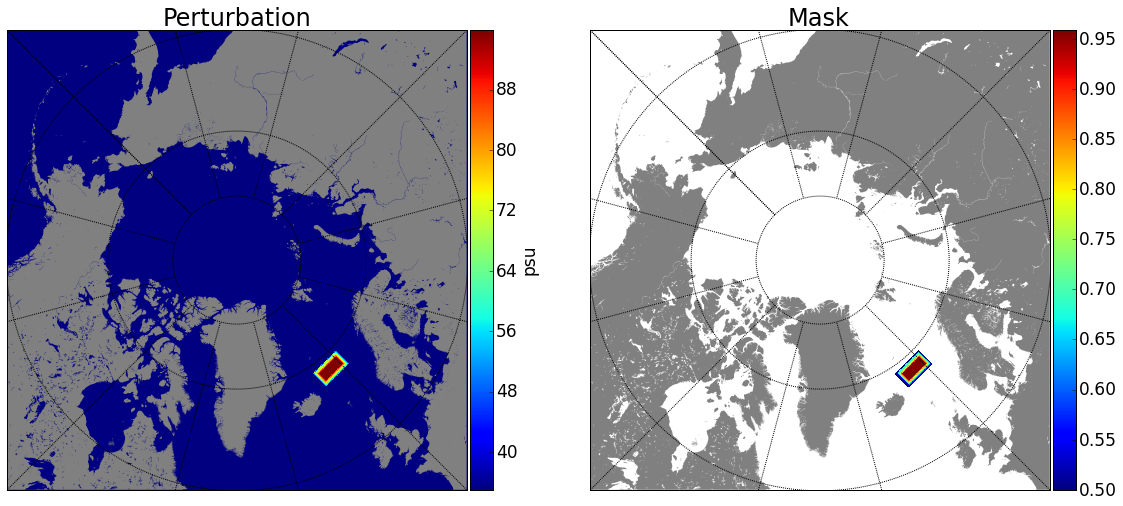

In [306]:
def basemap_perturbation(grid):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;
    sgn=1
    width=8000000. ; height=8000000.0 ;
    fig, axes = plt.subplots(1,2)
    m = Basemap(ax=axes[0],width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='navy')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='navy')
    x,y=m(grid['XC'],grid['YC'])
    
    mask = np.nanmean(values_read[35:44,:,:],axis=0)
    #mask[mask<35.2] = np.nan
    sitm = np.ma.masked_where(mask==0,mask)
        
    CS=m.pcolormesh(x,y,sitm)
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    axes[0].set_title('Perturbation',fontsize=24)
    divider = mpl_toolkits.axes_grid1.make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb1 = plt.colorbar(CS,cax=cax)
    cb1.ax.tick_params(labelsize=17)
    cb1.set_label('psu',fontsize=17)

    
    m = Basemap(ax=axes[1],width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='white')
    x,y=m(grid['XC'],grid['YC'])
    
    mask = np.nanmean(mask_read[35:44,:,:],axis=0)
    sitm = np.ma.masked_where(mask==0,mask)
    CS=m.pcolormesh(x,y,sitm)
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    axes[1].set_title('Mask',fontsize=24)
    divider = make_axes_locatable(axes[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb2 = plt.colorbar(CS,cax=cax)
    cb2.ax.tick_params(labelsize=17)
    
    fig.subplots_adjust(right=2.6,top=2.6)
    fig.savefig('/noc/users/am8e13/Figures/mask_pert',dpi=300, bbox_inches='tight')
basemap_perturbation(grid_mask)